### Linear Regression with PyTorch

About Linear Regression

1.1 Simple Linear Regression Basics
Allows us to understand relationship between two **continuous variables**
Example
    * x: independent variable
        * weight
    * y: dependent variable
        * height
* y = ax + B

### Example of simple linear regression

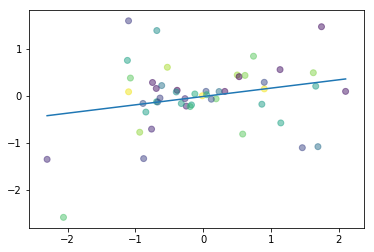

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

colors = np.random.rand(n)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

Model the behaviour between x and y variable
When x increase y increases
The main point its to see how linear regression trys to model a relationship between two variable
Minimizes the error to fit the points.

### Aim of Linear Regression
* Minimze the distance the points and line (y=ax + B)
* Adjusting
    * Coefficient: alpha
    * Bias/Intercept: Beta

### Building a Linear Regression Model with PyTorch

### Building a Toy Dataset

In [3]:
x_values = [i for i in range(11)]

In [4]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [21]:
# Convert to numpy 
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [22]:
# IMPORTANT: 2D required
x_train = x_train.reshape(-1,1)
x_train.shape

(11, 1)

y = 2x + 1

In [23]:
y_values = [2*i + 1 for i in x_values]

In [24]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [25]:
# Convert to numpy 
y_train = np.array(y_values, dtype=np.float32)
y_train.shape


(11,)

In [26]:
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

### Building Model

Critical Imports

In [64]:
import torch
import torch.nn as nn
from torch.autograd import Variable


Create Model

1. Linear model
    * True Equation: y = 2x + 1
2. Forward
    * Example
        * Input x = 1
        * Output y(hat) = ?

In [63]:
# Create a class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        out = self.linear(x)
        return out

Instantiate Model Class

* input: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
* output: [1, 3, 5, 7, 9, 11, 13 ,15, 17, 19, 21]

In [65]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

#### Instantiate Losss Class

* MSE Loss: Mean Squared Error
* MSE = 1/n SUM (from n to i=1) (y(hat) - y(i))
    * y(hat): prediction
    * y: true value

In [66]:
criterion = nn.MSELoss()

#### Instantiate Optimizer Class

* Simplified equation
    * theta = theta - n(long) * delta(sub theta)
        * theta: parameters (our variables)
        * n(long): learning rate(how fast we want to learn)
        * delta: parameters' gradients
* Even simplier equation
    * parameters = parameters - learning_rate * parameters_gradients
        * parameters: alpha and Beta in y = ax + B
        * desired parameters: alpha = 2 and Beta = 1 in y = 2x + 1

In [68]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

##### Train Model

* 1 epoch: going through the whole x_train data once
    * 100 epoch:
        * 100x mapping x_train = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
        
* Process
    1. Convert inputs/labels to variables
    2. Clear gradient buffets
    3. Get output given inputs
    4. Get loss
    5. Get gradients w.r.t parameters
    6. Update parameters using gradients
        * parameters = parameters - learning_rate * parameters_gradients
    7. REPEAT

In [62]:
epochs = 100

In [72]:
for epoch in range(epochs): 
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # Clear gradients w.r.t parameters
    optimizer.zero_grad()
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.data[0]))

epoch 1, loss 0.2325035035610199
epoch 2, loss 0.2299073338508606
epoch 3, loss 0.22733989357948303
epoch 4, loss 0.2248014509677887
epoch 5, loss 0.22229085862636566
epoch 6, loss 0.21980901062488556
epoch 7, loss 0.21735425293445587
epoch 8, loss 0.2149268537759781
epoch 9, loss 0.21252693235874176
epoch 10, loss 0.21015377342700958
epoch 11, loss 0.20780691504478455
epoch 12, loss 0.2054862380027771
epoch 13, loss 0.2031918615102768
epoch 14, loss 0.20092277228832245
epoch 15, loss 0.19867926836013794
epoch 16, loss 0.19646035134792328
epoch 17, loss 0.19426655769348145
epoch 18, loss 0.19209733605384827
epoch 19, loss 0.18995237350463867
epoch 20, loss 0.1878310739994049
epoch 21, loss 0.18573351204395294
epoch 22, loss 0.18365956842899323
epoch 23, loss 0.18160849809646606
epoch 24, loss 0.17958049476146698
epoch 25, loss 0.17757508158683777
epoch 26, loss 0.17559219896793365
epoch 27, loss 0.173631489276886
epoch 28, loss 0.1716926544904709
epoch 29, loss 0.16977526247501373
epoc

C:\Users\Abu\Anaconda3\envs\ana36\lib\site-packages\ipykernel_launcher.py:22: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


In [73]:
# Purely inference
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[ 0.48552454],
       [ 2.5596137 ],
       [ 4.6337028 ],
       [ 6.707792  ],
       [ 8.78188   ],
       [10.855969  ],
       [12.9300585 ],
       [15.004148  ],
       [17.078238  ],
       [19.152327  ],
       [21.226416  ]], dtype=float32)

In [74]:
# y = 2x + 1
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

#### Plot Graph

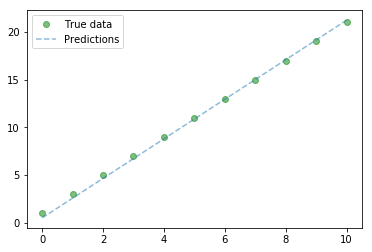

In [75]:
# Clear figure
plt.clf()

# Get predictions
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legends and plot
plt.legend(loc='best')
plt.show()

##### Save Model

In [76]:
save_model = False
if save_model is True:
    # Save only parameters
    torch.save(model.state_dict(), 'awesome_model.pkl')

##### Load Model

In [77]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))